<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/tackling_class_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Required libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix

## Loading Data

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#Siempre es mejor guardar los datos en formayo .pkl, mantiene el procesamiento de variables
train_transactions=pd.read_pickle('/content/drive/MyDrive/datasets/transactions_sample.pkl')
print('Train data set is loaded !')

Train data set is loaded !


<div align='left'><font size='4' color='#229954'>Getting basic Idea</font></div>

In [18]:
train_transactions.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
519050,3506050,0,13626390,44.00,9992,455.0,150.0,126.0,143.0,87.0,40.0,NaN,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,239.0,7.0,7.0,8.0,7.0,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101510,3088510,0,2048542,50.00,12883,404.0,150.0,226.0,387.0,87.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,534.708313,0.708333,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86241,3073241,1,1816041,250.00,10486,514.0,150.0,219.0,325.0,87.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74832,3061832,0,1641841,515.65,17188,321.0,150.0,226.0,299.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112387,3099387,0,2184361,36.95,7005,111.0,150.0,226.0,310.0,87.0,NaN,NaN,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,236.0,236.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
train_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59054 entries, 519050 to 255462
Columns: 380 entries, TransactionID to V339
dtypes: float64(376), int64(4)
memory usage: 171.7 MB


<div align='left'><font size='4' color='#229954'>Target variable</font></div>


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

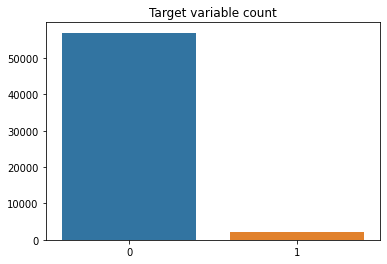

In [20]:
x=train_transactions['isFraud'].value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')


In [21]:
train_transactions.drop(columns  = ["TransactionID","TransactionDT"],inplace=True)

In [22]:
target = "isFraud"

In [23]:
X = train_transactions.drop(target,axis=1)
y = train_transactions[target]

In [24]:
#Hacemos cortes de entrenamiento y prueba
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

In [26]:
X_train.isnull().mean()

TransactionAmt    0.000000
card1             0.000000
card2             0.014055
card3             0.002286
card5             0.006943
                    ...   
V335              0.862159
V336              0.862159
V337              0.862159
V338              0.862159
V339              0.862159
Length: 377, dtype: float64

In [28]:
X_test.isnull().mean()

TransactionAmt    0.000000
card1             0.000000
card2             0.013885
card3             0.002371
card5             0.006265
                    ...   
V335              0.858352
V336              0.858352
V337              0.858352
V338              0.858352
V339              0.858352
Length: 377, dtype: float64

In [27]:
from sklearn.impute import SimpleImputer

In [29]:
imputer = SimpleImputer()
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)

In [30]:
X_train.isnull().mean()

TransactionAmt    0.0
card1             0.0
card2             0.0
card3             0.0
card5             0.0
                 ... 
V335              0.0
V336              0.0
V337              0.0
V338              0.0
V339              0.0
Length: 377, dtype: float64

In [31]:
X_test = pd.DataFrame(imputer.transform(X_test),columns = X_test.columns)

In [32]:
X_test.isnull().mean()

TransactionAmt    0.0
card1             0.0
card2             0.0
card3             0.0
card5             0.0
                 ... 
V335              0.0
V336              0.0
V337              0.0
V338              0.0
V339              0.0
Length: 377, dtype: float64


## [Resampling](#5)<a id="5"></a> <br>


![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

### Oversample minority class

In [41]:
from imblearn.over_sampling import RandomOverSampler


In [42]:
ran=RandomOverSampler()
X_ran_over, y_ran_over= ran.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

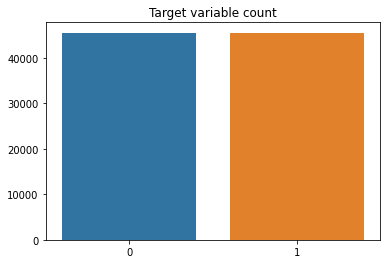

In [44]:
x=pd.DataFrame(y_ran_over).value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

###  Undersample majority class 


In [45]:
from imblearn.under_sampling import RandomUnderSampler


In [46]:
ran=RandomUnderSampler()
X_ran_under, y_ran_under= ran.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

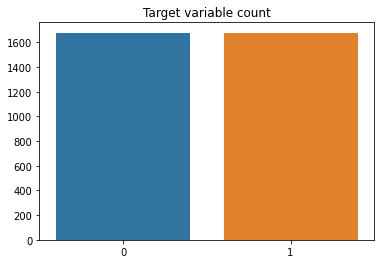

In [47]:
x=pd.DataFrame(y_ran_under).value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

### Over-sampling: SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

In [48]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE(sampling_strategy='minority')

In [51]:
X_sm, y_sm = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

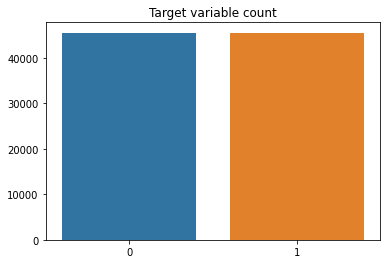

In [52]:
x=pd.DataFrame(y_sm).value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


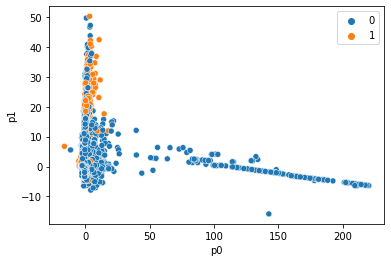

In [54]:
standar = StandardScaler()
X_train_std = pd.DataFrame(standar.fit_transform(X_train),columns = X_train.columns)

pca = PCA(2)
X_train_pca =pd.DataFrame( pca.fit_transform(X_train_std),columns = ["p0","p1"])

sns.scatterplot(data = X_train_pca,x="p0",y="p1",hue=y_train.values)

In [55]:
def evaluate_sampling(X_ran,y_ran,X_test,y_test):
    model  = LogisticRegression(solver='liblinear')
    model.fit(X_ran,y_ran)
    print(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))
    print(f1_score(y_test,model.predict(X_test)))    
    print(confusion_matrix(y_test,model.predict(X_test)))    
    

## Comparación de re muestreo

In [56]:
#Observamos que el F1 SCORE del modelo sin re muestreo es cero
evaluate_sampling(X_train,y_train, X_test,y_test)

0.725560369123386
0.0
[[11401     4]
 [  406     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [57]:
#El re muestreo por over sampling mejora el aprendizaje del modelo
evaluate_sampling(X_ran_over,y_ran_over, X_test,y_test)

0.7664956602302594
0.15503397158739962
[[8824 2581]
 [ 155  251]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [58]:
#El re muestreo por under sampling es el modelo ganador

evaluate_sampling(X_ran_under,y_ran_under, X_test,y_test)

0.7786131093656529
0.18255428781744573
[[9342 2063]
 [ 158  248]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [59]:
#El re muestreo del modelo SMOTE es el segundo modelo
evaluate_sampling(X_sm,y_sm, X_test,y_test)

0.7629735251369744
0.16162901686286987
[[8922 2483]
 [ 152  254]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
